## Employee Salary Prediction :

### Importing the Dependencies :

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset :

In [2]:
data=pd.read_csv("salary.csv")

In [3]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [7]:
# checking the number of rows and Columns in the data frame
data.shape

(375, 6)

In [8]:
#checking the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [9]:
#Checking the null values
data.isnull()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
370,False,False,False,False,False,False
371,False,False,False,False,False,False
372,False,False,False,False,False,False
373,False,False,False,False,False,False


In [10]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

#### dropping the null values:

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [15]:
#description of the dataset:
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


### Understanding the correlation between features in the dataset :
- Positive Correlation
- Negative Correlation

In [26]:
correlation=data.corr(numeric_only=True)

<Axes: >

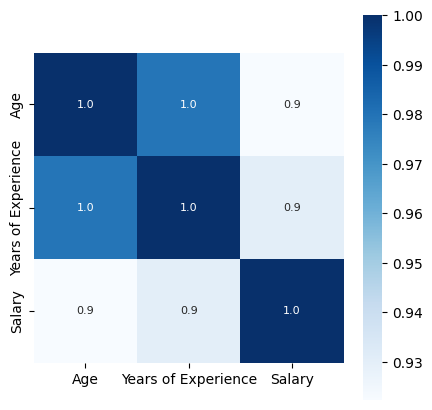

In [28]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [19]:
data["Gender"].value_counts()

Gender
Male      194
Female    179
Name: count, dtype: int64

In [29]:
# Average salary for male
male_avg=(data[data['Gender']=='Male']['Salary']).mean()
print(male_avg)

103867.78350515464


In [30]:
# Average salary for female
female_avg=(data[data['Gender']=='Female']['Salary']).mean()
print(female_avg)

97011.17318435754


Text(0, 0.5, 'Average Salary')

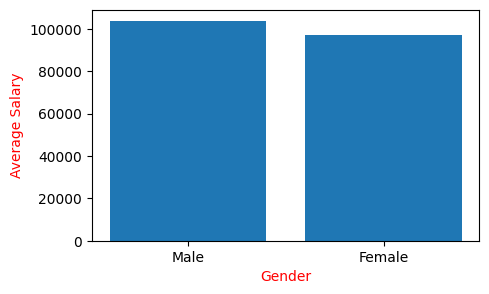

In [38]:
plt.figure(figsize=(5,3))
plt.bar(["Male","Female"],[male_avg,female_avg])
plt.xlabel("Gender",color='red')
plt.ylabel("Average Salary",color='red')

In [47]:
data["Education Level"].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [48]:
data["Job Title"].value_counts()

Job Title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64

In [51]:
print(data['Job Title'].unique())

['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 'Business Intelligence Analyst' 'Event Coordinator' 'VP of Finance'
 'G

In [52]:
print(len(data['Job Title'].unique()))

174


### Realtionship between Age and Saary:

Text(0, 0.5, 'Salary')

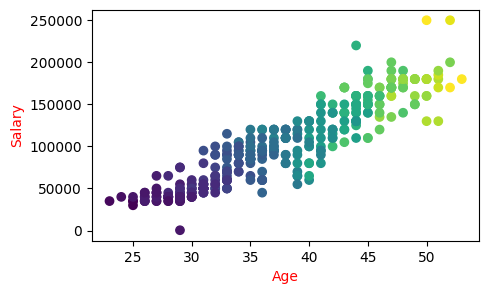

In [46]:
plt.figure(figsize=(5,3))
plt.scatter(data['Age'],data['Salary'],c=data['Years of Experience'])
plt.xlabel("Age",color='red')
plt.ylabel("Salary",color='red')

### Realtionship between Years of Experience and Saary:

Text(0, 0.5, 'Salary')

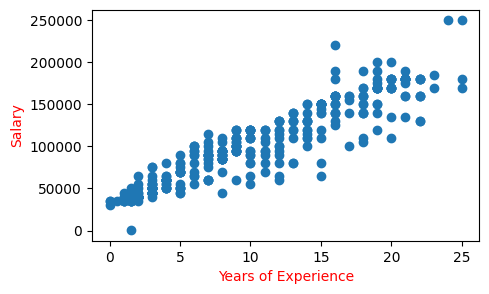

In [44]:
plt.figure(figsize=(5,3))
plt.scatter(data['Years of Experience'],data['Salary'])
plt.xlabel("Years of Experience",color='red')
plt.ylabel("Salary",color='red')